In [79]:
%pylab inline

from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


In [3]:
### https://www.istat.it/it/files//2020/03/Tavola-sintetica-decessi.xlsx

with open("Desktop/decessi.csv", "r") as fd:
    data = fd.readlines()


In [73]:
factor_list = []
factor_m = []
factor_f = []

thr = 50.

for row in data[2:]:
    els = row.rstrip().split(";")
    v19 = float(els[8])
    v20 = float(els[11])
    v19m = float(els[6])
    v20m = float(els[9])
    v19f = float(els[7])
    v20f = float(els[10])
    val = v20/(v19+0.0000001)
    valf = v20f/(v19f+0.0000001)
    valm = v20m/(v19m+0.0000001)
    
    try:
        if val<thr:
            factor_list.append(val)
        if valf<thr:
            factor_f.append(valf)
        if valm<thr:
            factor_m.append(valm)
    except:
        pass

(0, 10)

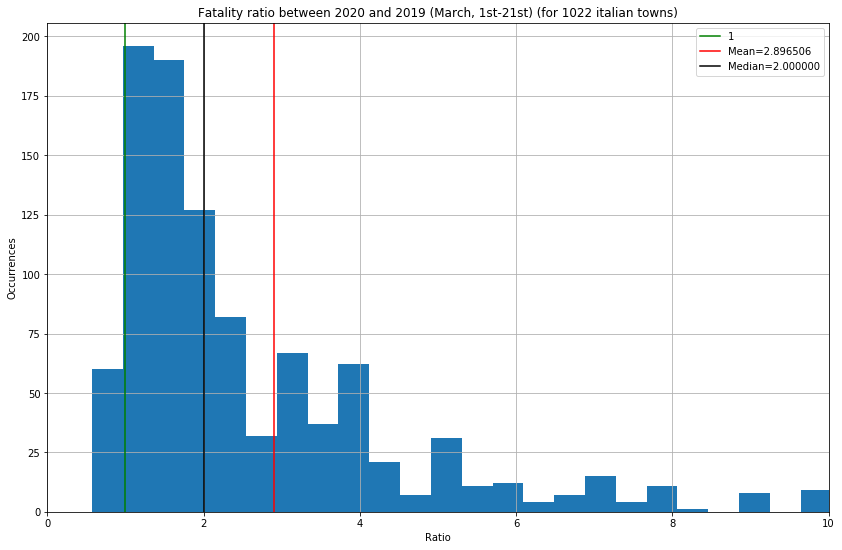

In [74]:
figure(figsize=(14,9))
hist(factor_list, bins=67)

median_val = np.median(factor_list)
mean_val = np.mean(factor_list)

axvline(1.0, c='g', label="1")
axvline(mean_val, c='r', label="Mean=%f"%mean_val)
axvline(median_val, c='k', label="Median=%f"%median_val)
grid()
title("Fatality ratio between 2020 and 2019 (March, 1st-21st) (for %d italian towns)"%len(factor_list))
xlabel("Ratio")
ylabel("Occurrences")
legend()
xlim(0,10)

(0, 10)

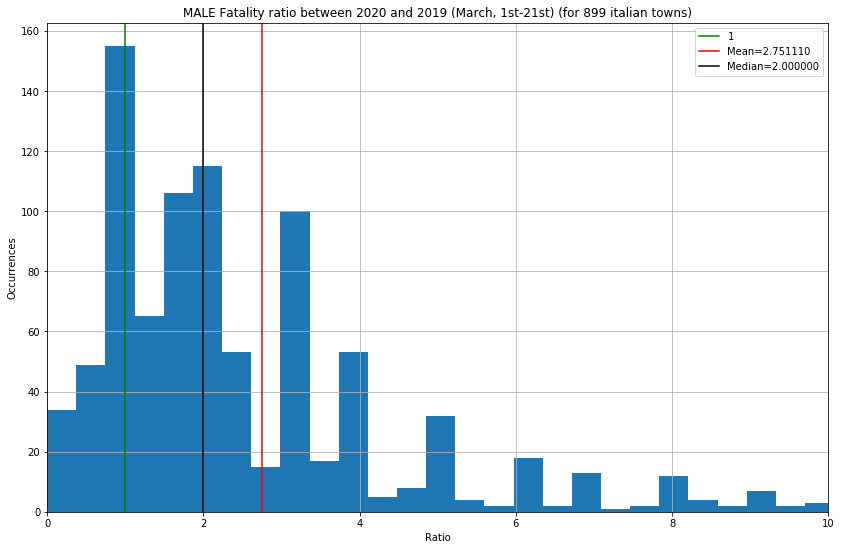

In [75]:
figure(figsize=(14,9))
hist(factor_m, bins=67)

median_val = np.median(factor_m)
mean_val = np.mean(factor_m)

axvline(1.0, c='g', label="1")
axvline(mean_val, c='r', label="Mean=%f"%mean_val)
axvline(median_val, c='k', label="Median=%f"%median_val)
grid()
title("MALE Fatality ratio between 2020 and 2019 (March, 1st-21st) (for %d italian towns)"%len(factor_m))
xlabel("Ratio")
ylabel("Occurrences")
legend()
xlim(0,10)

(0, 10)

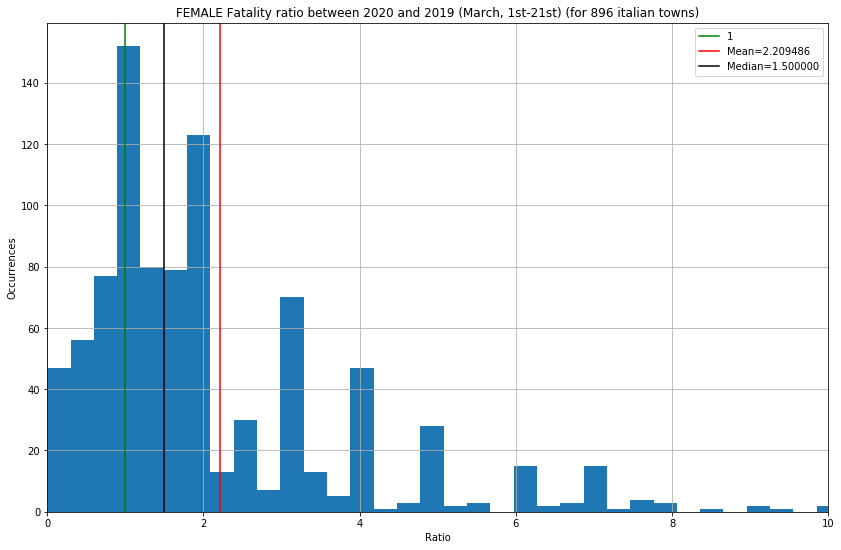

In [76]:
figure(figsize=(14,9))
hist(factor_f, bins=67)

median_val = np.median(factor_f)
mean_val = np.mean(factor_f)

axvline(1.0, c='g', label="1")
axvline(mean_val, c='r', label="Mean=%f"%mean_val)
axvline(median_val, c='k', label="Median=%f"%median_val)
grid()
title("FEMALE Fatality ratio between 2020 and 2019 (March, 1st-21st) (for %d italian towns)"%len(factor_f))
xlabel("Ratio")
ylabel("Occurrences")
legend()
xlim(0,10)

In [78]:
data


['totale decessi;;;;;;1-21 MARZO 2019;;;1-21 MARZO 2020;;;incremento %;;;\n',
 'REG;PROV;NOME_REGIONE;NOME_PROVINCIA;NOME_COMUNE;COD_PROVCOM;M;F;M+F;M;F;M+F;M;F;M+F;\n',
 '01;001;Piemonte;Torino;Agliè;001001;1;2;3;3;4;7;200.0;100.0;133.3;2.33333255555581\n',
 '01;001;Piemonte;Torino;Almese;001006;1;1;2;1;2;3;0.0;100.0;50.0;1.49999925000038\n',
 '01;001;Piemonte;Torino;Banchette;001020;1;0;1;5;1;6;400.0;-;500.0;5.999994000006\n',
 '01;001;Piemonte;Torino;Beinasco;001024;7;11;18;16;11;27;128.6;0.0;50.0;1.49999991666667\n',
 '01;001;Piemonte;Torino;Buttigliera Alta;001045;2;2;4;2;4;6;0.0;100.0;50.0;1.49999962500009\n',
 '01;001;Piemonte;Torino;Carmagnola;001059;10;7;17;13;11;24;30.0;57.1;41.2;1.41176462283738\n',
 '01;001;Piemonte;Torino;Castellamonte;001066;4;5;9;6;3;9;50.0;-40.0;0.0;0.999999888888901\n',
 '01;001;Piemonte;Torino;Frossasco;001110;0;1;1;2;3;5;-;200.0;400.0;4.999995000005\n',
 '01;001;Piemonte;Torino;Lanzo Torinese;001128;0;2;2;7;1;8;-;-50.0;300.0;3.999998000001\n',
 '01;0

In [90]:
# a livello di provincia

factor_list = []
factor_m = []

prov_dict = defaultdict(list)
prov_code_dict = {}

dead_19_town = defaultdict(list)
dead_20_town = defaultdict(list)

dead_19_prov = defaultdict(int)
dead_20_prov = defaultdict(int)

for row in data[2:]:
    els = row.rstrip().split(";")
    reg_code = els[0]
    prov_code = els[1]
    reg_name = els[2]
    prov_name = els[3]
    town_name = els[4]
    
    prov_code_dict[prov_name] = prov_code
    prov_dict[reg_name].append(town_name)
    
    dead_19 = float(els[8])
    dead_20 = float(els[11])
    dead_19_town[town_name].append(dead_19)
    dead_20_town[town_name].append(dead_20)
    
    dead_19_prov[prov_name] += dead_19
    dead_20_prov[prov_name] += dead_20
    
#    v19m = float(els[6])
#    v20m = float(els[9])
#    v19f = float(els[7])
#    v20f = float(els[10])
#    val = v20/(v19+0.0000001)
#    valf = v20f/(v19f+0.0000001)
#    valm = v20m/(v19m+0.0000001)

In [91]:
ratio_list = []

for prov in dead_19_prov:
    ratio_list.append(dead_20_prov[prov] / dead_19_prov[prov])
    print (prov_code_dict[prov], prov, dead_19_prov[prov], dead_20_prov[prov], dead_20_prov[prov] / dead_19_prov[prov])

001 Torino 136.0 206.0 1.5147058823529411
002 Vercelli 40.0 66.0 1.65
003 Novara 74.0 112.0 1.5135135135135136
004 Cuneo 80.0 129.0 1.6125
005 Asti 11.0 27.0 2.4545454545454546
006 Alessandria 182.0 293.0 1.60989010989011
007 Valle d'Aosta/Vallée d'Aoste 29.0 39.0 1.3448275862068966
008 Imperia 93.0 145.0 1.5591397849462365
009 Savona 62.0 93.0 1.5
010 Genova 50.0 64.0 1.28
011 La Spezia 30.0 48.0 1.6
012 Varese 54.0 85.0 1.5740740740740742
013 Como 114.0 178.0 1.5614035087719298
014 Sondrio 27.0 44.0 1.6296296296296295
015 Milano 1537.0 2176.0 1.4157449577098242
016 Bergamo 450.0 2493.0 5.54
017 Brescia 466.0 1345.0 2.8862660944206007
018 Pavia 180.0 428.0 2.3777777777777778
019 Cremona 182.0 700.0 3.8461538461538463
020 Mantova 179.0 317.0 1.770949720670391
022 Trento 64.0 102.0 1.59375
023 Verona 79.0 140.0 1.7721518987341771
024 Vicenza 103.0 191.0 1.854368932038835
025 Belluno 35.0 47.0 1.3428571428571427
026 Treviso 96.0 219.0 2.28125
027 Venezia 110.0 148.0 1.3454545454545455
02

(array([17., 38., 22., 11.,  1.,  5.,  1.,  1.,  1.,  0.,  2.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.93103448,  1.2937931 ,  1.65655172,  2.01931034,  2.38206897,
         2.74482759,  3.10758621,  3.47034483,  3.83310345,  4.19586207,
         4.55862069,  4.92137931,  5.28413793,  5.64689655,  6.00965517,
         6.37241379,  6.73517241,  7.09793103,  7.46068966,  7.82344828,
         8.1862069 ,  8.54896552,  8.91172414,  9.27448276,  9.63724138,
        10.        ]),
 <a list of 25 Patch objects>)

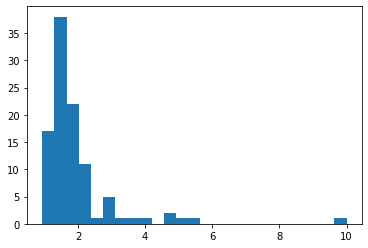

In [97]:
hist(ratio_list, bins=25)

In [98]:
np.mean(ratio_list)

1.9538372730617437